# 誤差逆伝播法


#### 前回の内容
- 逆伝播が**連鎖律**によって成り立つ：合成関数の偏微分は、**連鎖律によって複数の偏微分の積の形に変形できる**。
- 簡単のレイヤーで逆伝播を実装することで、逆伝播の原理を理解した


#### 今回の内容
- ニューラルネットワーク全体に対して誤差逆伝播法によるパラメータを更新する流れを理解する。
- ニューラルネットワークで誤差逆伝播法で複数のパラメータ最適化を実装し、手書き数字を識別する。


![誤差逆伝播法 (backpropagation) の計算過程](https://tutorials.chainer.org/ja/_images/13_backpropagation.gif)

### Affineレイヤー



$$
\mathbf{Y} = \mathbf{X}\mathbf{W}+\mathbf{B}
$$
$$
\mathbf{L} = Z (\mathbf{Y})
$$


<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.amazonaws.com%2F0%2F121304%2F409245cd-9b50-b40f-3a4d-b3adbf2da0df.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=394ef3d3f33c088000b6a67debf0c11d" alt="drawing" width="500"/>


入力として$\boldsymbol{x} = (x_1\; x_2)$の２次元だとします。 この入力に対して、第１層目への出力を３つにしたい場合、$(2, 3)$の行列を右からかけます。

$$
\boldsymbol{W}= \begin{pmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32} 
\end{pmatrix}
$$
出力$\boldsymbol{Y}$は

\begin{align}
\boldsymbol{Y} &= \boldsymbol{X} \cdot \boldsymbol{W} \\
&=
\begin{pmatrix}
x_1 & x_2
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{21} & w_{31} \\
w_{12} & w_{22} & w_{32} 
\end{pmatrix} \\
&= 
\begin{pmatrix}
w_{11}x_1+w_{12}x_2 & w_{21}x_1+w_{22}x_2 & w_{31}x_1+w_{32}x_2
\end{pmatrix} \\
&=
\begin{pmatrix}
y_1 & y_2 & y_3
\end{pmatrix}　\tag{1.1}
\end{align}
となります。 損失関数$L$の入力$\boldsymbol{X}$による偏微分は$x_1, x_2$が$y_1, y_2, y_3$に出てくることに注意すると、

\begin{align}
\frac{\partial L}{\partial \boldsymbol{X}} &= 
\begin{pmatrix}
\frac{\partial L}{\partial x_1} & \frac{\partial L}{\partial x_2}
\end{pmatrix} \\
&=
\begin{pmatrix}
\frac{\partial L}{\partial \boldsymbol{Y}} \cdot \frac{\partial \boldsymbol{Y}}{\partial x_1} & \frac{\partial L}{\partial \boldsymbol{Y}} \cdot \frac{\partial \boldsymbol{Y}}{\partial x_2}
\end{pmatrix} 
\end{align}
ここで

\begin{align}
\frac{\partial L}{\partial \boldsymbol{Y}} \cdot \frac{\partial \boldsymbol{Y}}{\partial x_1} = 
\begin{pmatrix}
\frac{\partial L}{\partial y_1} & \frac{\partial L}{\partial y_2} & \frac{\partial L}{\partial y_3}
\end{pmatrix}
\cdot
\begin{pmatrix}
\frac{\partial y_1}{\partial x_1} \\
\frac{\partial y_2}{\partial x_1} \\
\frac{\partial y_3}{\partial x_1} 
\end{pmatrix}
\end{align}


\begin{aligned}
$\frac{\partial L}{\partial \boldsymbol{X}}$ = 
\begin{pmatrix}
\frac{\partial L}{\partial y_1} \frac{\partial y_1}{\partial x_1} +
\frac{\partial L}{\partial y_2} \frac{\partial y_2}{\partial x_1} +
\frac{\partial L}{\partial y_3} \frac{\partial y_3}{\partial x_1} &
\frac{\partial L}{\partial y_1} \frac{\partial y_1}{\partial x_2} +
\frac{\partial L}{\partial y_2} \frac{\partial y_2}{\partial x_2} +
\frac{\partial L}{\partial y_3} \frac{\partial y_3}{\partial x_2} 
\end{pmatrix} \\
=
\begin{pmatrix}
\frac{\partial L}{\partial y_1} w_{11} +
\frac{\partial L}{\partial y_2} w_{21} +
\frac{\partial L}{\partial y_3} w_{31} &
\frac{\partial L}{\partial y_1} w_{12} +
\frac{\partial L}{\partial y_2} w_{22} +
\frac{\partial L}{\partial y_3} w_{32}
\end{pmatrix} \\
=
\begin{pmatrix}
\frac{\partial L}{\partial y_1} & \frac{\partial L}{\partial y_2} & \frac{\partial L}{\partial y_3}
\end{pmatrix} 
\begin{pmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32}
\end{pmatrix} \\
= $\frac{\partial L}{\partial \boldsymbol{Y}}\cdot \boldsymbol{W}^T$
\end{aligned}


\begin{aligned}
$\frac{\partial L}{\partial \boldsymbol{X}}$ = 
\begin{pmatrix}
\frac{\partial L}{\partial y_1} \frac{\partial y_1}{\partial x_1} +
\frac{\partial L}{\partial y_2} \frac{\partial y_2}{\partial x_1} +
\frac{\partial L}{\partial y_3} \frac{\partial y_3}{\partial x_1} &
\frac{\partial L}{\partial y_1} \frac{\partial y_1}{\partial x_2} +
\frac{\partial L}{\partial y_2} \frac{\partial y_2}{\partial x_2} +
\frac{\partial L}{\partial y_3} \frac{\partial y_3}{\partial x_2} 
\end{pmatrix} \\
=
\begin{pmatrix}
\frac{\partial L}{\partial y_1} w_{11} +
\frac{\partial L}{\partial y_2} w_{21} +
\frac{\partial L}{\partial y_3} w_{31} &
\frac{\partial L}{\partial y_1} w_{12} +
\frac{\partial L}{\partial y_2} w_{22} +
\frac{\partial L}{\partial y_3} w_{32}
\end{pmatrix} \\
=
\begin{pmatrix}
\frac{\partial L}{\partial y_1} & \frac{\partial L}{\partial y_2} & \frac{\partial L}{\partial y_3}
\end{pmatrix} 
\begin{pmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32}
\end{pmatrix} \\
= $\frac{\partial L}{\partial \boldsymbol{Y}}\cdot \boldsymbol{W}^T$
\end{aligned}

一方、損失関数$L$の重み$\boldsymbol{W}$による偏微分は

\begin{align}
\frac{\partial L}{\partial \boldsymbol{W}} &= 
\begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} 
\end{pmatrix} \\
\end{align}
です。 ここで、$(1.1)$式において、$w_{11}$は$y_1$だけに、$w_{12}$は$y_1$だけに、・・・$w_{31}$は$y_3$だけに、$w_{32}$は$y_3$だけに出てくることに注意すると、

\begin{align}
\frac{\partial L}{\partial w_{11}} &= \frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{11}} \\
\frac{\partial L}{\partial w_{12}} &= \frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{12}} \\
\frac{\partial L}{\partial w_{21}} &= \frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{21}} \\
\frac{\partial L}{\partial w_{22}} &= \frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{22}} \\
\frac{\partial L}{\partial w_{31}} &= \frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{31}} \\
\frac{\partial L}{\partial w_{32}} &= \frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{32}}
\end{align}
となります。 したがって、$\frac{\partial L}{\partial \boldsymbol{W}}$は

\begin{align}
\frac{\partial L}{\partial \boldsymbol{W}} &= 
\begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
\frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} 
\end{pmatrix} \\
&= 
\begin{pmatrix}
\frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{11}} &
\frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{21}} &
\frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{31}} \\
\frac{\partial L}{\partial y_1}\frac{\partial y_1}{\partial w_{12}} & \frac{\partial L}{\partial y_2}\frac{\partial y_2}{\partial w_{22}} &
\frac{\partial L}{\partial y_3}\frac{\partial y_3}{\partial w_{32}}
\end{pmatrix} \\
&=
\begin{pmatrix}
\frac{\partial L}{\partial y_1}x_1 &
\frac{\partial L}{\partial y_2}x_1 &
\frac{\partial L}{\partial y_3}x_1 \\
\frac{\partial L}{\partial y_1}x_2 &
\frac{\partial L}{\partial y_2}x_2 &
\frac{\partial L}{\partial y_3}x_2
\end{pmatrix} \\
&= \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\begin{pmatrix}
\frac{\partial L}{\partial y_1} &
\frac{\partial L}{\partial y_2} &
\frac{\partial L}{\partial y_3} 
\end{pmatrix} \\
&= \boldsymbol{X}^T \cdot \frac{\partial L}{\partial \boldsymbol{Y}}
\end{align}
これで、

\begin{align}
\frac{\partial L}{\partial \boldsymbol{W}} &=
\boldsymbol{X}^T \cdot \frac{\partial L}{\partial \boldsymbol{Y}}
\end{align}
の導出が（低次元で、活性化関数も考慮していませんが）できました。



$$
\frac{\partial L}{\partial \mathbf{X}}= \frac{\partial L}{\partial \mathbf{Y}} W^\mathrm{T} 
$$

$$
\frac{\partial L}{\partial \mathbf{W}}= X^\mathrm{T} \frac{\partial L}{\partial \mathbf{Y}}  
$$

### バッチ版Affineレイヤの逆伝播

複数の層の場合にも対応できるような説明を加えます

#### 順伝播の確認

第1層の入力$\mathbf{X}$は、行数がバッチサイズ$N$、列数がピクセルデータ数$28^2$に対応するため、$N \times 784$の行列とします。<br />
　これに対応する(第1層の)重み$\mathbf{W}$は、行数がピクセルデータ数、列数が隠れ層のニューロン数に対応するため、$ 784\times M$の行列になります。隠れ層のニューロン数は自由に決められるため$M$とします。最終層の重みであれば、行数は最終層の入力の列数、列数は0から9の数字の数10に対応します。この項では1層のニューラルネットワークを扱うため、重み$\mathbf{W}$は$784 \times 10$の行列とします。<br />
バイアス$\mathbf{B}$は、要素数が10の1次元配列とします。
$$
\mathbf{X}
    = \begin{pmatrix}
          x_{11} & x_{12} & \cdots & x_{1,784} \\
          x_{21} & x_{22} & \cdots & x_{2,784} \\
          \vdots & \vdots & \ddots & \vdots \\
          x_{N1} & x_{N2} & \cdots & x_{N,784}
      \end{pmatrix}
,\ 
\mathbf{W}
    = \begin{pmatrix}
          w_{11} & w_{12} & \cdots & w_{1,10} \\
          w_{21} & w_{22} & \cdots & w_{2,10} \\
          \vdots & \vdots & \ddots & \vdots \\
          w_{784,1} & w_{784,2} & \cdots & w_{784,10}
      \end{pmatrix}
$$

バイアス$\mathbf{B}$は、要素数が10の1次元配列とします。
$$
\mathbf{B}
    = (b_1, b_2, \cdots, b_{10})
$$

本来は行列と1次元配列の和は計算できません。これは複数の画像データを1枚ずつ(forループのように)処理するとき、同じバイアス変数を使って計算することに対応します。つまり次のような行列との和を計算するイメージです。

$$
\mathbf{B}
    = \begin{pmatrix}
          b_1 & b_2 & \cdots & b_{10} \\
          b_1 & b_2 & \cdots & b_{10} \\
          \vdots & \vdots & \ddots & \vdots \\
          b_1 & b_2 & \cdots & b_{10}
      \end{pmatrix}
$$

```
  def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
```

従って第1層のAffineレイヤの順伝播の出力(計算結果)$\mathbf{Y}$は

$$
\begin{aligned}
\mathbf{Y}
   &= \mathbf{X} \mathbf{W}
      + \mathbf{B}
\\
   &= \begin{pmatrix}
          \sum_{j=1}^{784} x_{1j} w_{j1} + b_1 & \sum_{j=1}^{784} x_{1j} w_{j2} + b_2 & \cdots & \sum_{j=1}^{784} x_{1j} w_{j,10} + b_{10} \\
          \sum_{j=1}^{784} x_{2j} w_{j1} + b_1 & \sum_{j=1}^{784} x_{2,j} w_{j2} + b_2 & \cdots & \sum_{j=1}^{784} x_{2j} w_{j,10} + b_{10} \\
          \vdots & \vdots & \ddots & \vdots \\
          \sum_{j=1}^{784} x_{Nj} w_{j1} + b_1 & \sum_{j=1}^{784} x_{Nj} w_{j2} + b_2 & \cdots & \sum_{j=1}^{784} x_{Nj} w_{j,10} + b_{10}
      \end{pmatrix}
\\
   &= \begin{pmatrix}
          y_{11} & y_{12} & \cdots & y_{1,10} \\
          y_{21} & y_{22} & \cdots & y_{2,10} \\
          \vdots & \vdots & \ddots & \vdots \\
          y_{N1} & y_{N2} & \cdots & y_{N,10}
      \end{pmatrix}
\end{aligned}
$$

#### 逆伝播の導出

最終層のAffineレイヤの出力$\mathbf{Y}$は、損失関数レイヤの入力となり、交差エントロピー誤差$L$として出力されるのでした。よって最終層のAffineレイヤには、$L$を$\mathbf{Y}$で微分した
$$
\frac{\partial L}{\partial \mathbf{Y}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \cdots & \frac{\partial L}{\partial y_{1,10}} \\
          \frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \cdots & \frac{\partial L}{\partial y_{2,10}} \\
          \vdots & \vdots & \ddots & \vdots \\
          \frac{\partial L}{\partial y_{N1}} & \frac{\partial L}{\partial y_{N2}} & \cdots & \frac{\partial L}{\partial y_{N,10}} \\
      \end{pmatrix}
$$

重み$\mathbf{W}$の微分を例として計算してみます。

$L$に対する入力$\mathbf{W}$の微分$\frac{\partial L}{\partial \mathbf{W}}$を考えます。これも連鎖率より
$$
\frac{\partial L}{\partial \mathbf{W}}
    = \frac{\partial L}{\partial \mathbf{Y}}
      \frac{\partial \mathbf{Y}}{\partial \mathbf{W}}
$$

まずは、重み$\mathbf{W}$の1行1列目の要素$w_{11}$による$L$の微分を考えます。$\frac{\partial L}{\partial w_{11}}$は、連鎖率より

$$
\frac{\partial L}{\partial w_{11}}
    = \frac{\partial L}{\partial \mathbf{y}_{\cdot 1}}
      \frac{\partial \mathbf{y}_{\cdot 1}}{\partial w_{11}}
$$

と分解できます。

ここで、重みの1列目に対応する$\mathbf{Y}$の1列目を$\mathbf{y}_{\cdot 1}$としています。$\mathbf{y}_{\cdot 1}$は$10 \times 1$の行列です。各要素を詳しくみると

$$
\mathbf{y}_{\cdot 1}
    = \begin{pmatrix}
          y_{11} \\
          y_{12} \\
          \vdots \\
          y_{1,10}
      \end{pmatrix}
    = \begin{pmatrix}
          \sum_{j=1}^{784} x_{1j} w_{j1} + b_1 \\
          \sum_{j=1}^{784} x_{2j} w_{j1} + b_1 \\
          \vdots \\
          \sum_{j=1}^{784} x_{Nj} w_{j1} + b_1
      \end{pmatrix}
$$

どの要素も$w_{11}$を含んでいることが分かります。

これを$w_{11}$で微分すると、各要素において$w_{11}$の係数になっている項(入力$x_{i1}$)だけが残るので
$$
\frac{\partial \mathbf{y}_{\cdot 1}}{\partial w_{11}}
    = \begin{pmatrix}
          x_{11} & x_{21} & \cdots & x_{N1}
      \end{pmatrix}
$$

これを連鎖率の式に代入すると

$$
\begin{aligned}
\frac{\partial L}{\partial w_{11}}
    &= \frac{\partial L}{\partial \mathbf{y}_{\cdot 1}}
       \frac{\partial \mathbf{y}_{\cdot 1}}{\partial w_{11}}
 \\
    &= \begin{pmatrix}
           \frac{\partial L}{\partial y_{11}} \\
           \frac{\partial L}{\partial y_{21}} \\
           \vdots \\
           \frac{\partial L}{\partial y_{N1}}
       \end{pmatrix}
       \begin{pmatrix}
          x_{11} & x_{21} & \cdots & x_{N1}
      \end{pmatrix}
\\
    &= \begin{pmatrix}
           \frac{\partial L}{\partial y_{11}} x_{11} & \frac{\partial L}{\partial y_{11}} x_{21} & \cdots & \frac{\partial L}{\partial y_{11}} x_{N1} \\
           \frac{\partial L}{\partial y_{21}} x_{11} & \frac{\partial L}{\partial y_{21}} x_{21} & \cdots & \frac{\partial L}{\partial y_{21}} x_{N1} \\
           \vdots & \vdots & \ddots & \vdots \\
           \frac{\partial L}{\partial y_{N1}} x_{11} & \frac{\partial L}{\partial y_{N1}} x_{21} & \cdots & \frac{\partial L}{\partial y_{N1}} x_{N1}
       \end{pmatrix}
\end{aligned}
$$



$$
\begin{aligned}
\frac{\partial L}{\partial w_{11}}
   &= \frac{\partial L}{\partial y_{11}} x_{11}
      + \frac{\partial L}{\partial y_{21}} x_{21}
      + \cdots
      + \frac{\partial L}{\partial y_{N1}} x_{N1}
\\
   &= \sum_{i=1}^N \frac{\partial L}{\partial y_{i1}} x_{i1}
\end{aligned}
$$

$L$と$w_{11}$はスカラなので、その微分もスカラになります。

重み$\mathbf{W}$の1行目を$\mathbf{w}_{1 \cdot} = (w_{11}, w_{12}, \cdots, w_{1,10})$として、他の要素についても同様に求めると、$\mathbf{w}_{1 \cdot}$による$L$微分は次のようになる

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}_{1 \cdot}}
   &= \begin{pmatrix}
           \sum_{i=1}^N \frac{\partial L}{\partial y_{i1}} x_{i1} & \sum_{i=1}^N \frac{\partial L}{\partial y_{i2}} x_{i1} & \cdots & \sum_{i=1}^N \frac{\partial L}{\partial y_{i,10}} x_{i1}
      \end{pmatrix}
\end{aligned}
$$

スカラ$L$を$1 \times 784$行列$\mathbf{w}_{1 \cdot}$で微分した結果は、同じ形状である$1 \times 784$の行列となります。

更に、全ての要素$\mathbf{W}$での微分について考えると

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{X}}
   &= \frac{\partial L}{\partial \mathbf{Y}}
      \frac{\partial \mathbf{Y}}{\partial \mathbf{X}}
\\
   &= \begin{pmatrix}
          \sum_{i=1}^N \frac{\partial L}{\partial y_{i1}} x_{i1} & \sum_{i=1}^N \frac{\partial L}{\partial y_{i2}} x_{i1} & \cdots & \sum_{i=1}^N \frac{\partial L}{\partial y_{i,10}} x_{i1} \\
          \sum_{i=1}^N \frac{\partial L}{\partial y_{i1}} x_{i2} & \sum_{i=1}^N \frac{\partial L}{\partial y_{i2}} x_{i2} & \cdots & \sum_{i=1}^N \frac{\partial L}{\partial y_{i,10}} x_{i2} \\
          \vdots & \vdots & \ddots & \vdots \\
          \sum_{i=1}^N \frac{\partial L}{\partial y_{i1}} x_{i,784} & \sum_{i=1}^N \frac{\partial L}{\partial y_{i2}} x_{i,784} & \cdots & \sum_{i=1}^N\frac{\partial L}{\partial y_{i10}} x_{i,784}
      \end{pmatrix}
\end{aligned}
$$
となります。

この計算結果は、次のように分解できます。

$$
\begin{align}
\frac{\partial L}{\partial \mathbf{W}}
   &= \begin{pmatrix}
          x_{11} & x_{21} & \cdots & x_{N1} \\
          x_{12} & x_{22} & \cdots & x_{N2} \\
          \vdots & \vdots & \ddots & \vdots \\
          x_{1,784} & x_{2,784} & \cdots & x_{N,784}
      \end{pmatrix}
      \begin{pmatrix}
          \frac{\partial L}{\partial y_{11}} & \frac{\partial L}{\partial y_{12}} & \cdots & \frac{\partial L}{\partial y_{1,10}} \\
          \frac{\partial L}{\partial y_{21}} & \frac{\partial L}{\partial y_{22}} & \cdots & \frac{\partial L}{\partial y_{2,10}} \\
          \vdots & \vdots & \ddots & \vdots \\
          \frac{\partial L}{\partial y_{N1}} & \frac{\partial L}{\partial y_{N2}} & \cdots & \frac{\partial L}{\partial y_{N,10}}
      \end{pmatrix}
\\
   &= \mathbf{X}^{\mathrm{T}}
      \frac{\partial L}{\partial \mathbf{Y}}
\tag{5.13.1}
\end{align}
$$

### ミニバッチ学習

1. 訓練データセットから一様ランダムに $N_{b} \ (>0)$ 個のデータを抽出する
2. その $N_{b}$ 個のデータをまとめてニューラルネットワークに入力し、それぞれのデータに対する目的関数の値を計算する
3. $N_b$ 個の目的関数の値の平均をとる
4. この平均の値に対する各パラメータの勾配を求める
5. 求めた勾配を使ってパラメータを更新する






### 誤差逆伝播法の実装

ここまで、Afflineレイヤーまた活性化関数に対して逆伝播で値を計算する方法を理解できたと思います。<br /> 実際のニューラルネットワークで逆伝播を活用する場合は**誤差逆伝播法**になります。<br />

ニューラルネットワークを構成する関数が持つパラメータについての**目的関数の勾配**を、順伝播で通った経路を逆向きにたどるようにして**途中の関数の勾配の掛け算**によって求める

ここから、手計算を通じて誤差逆伝播法の実装を理解しましよう。

<img src="https://images2015.cnblogs.com/blog/853467/201606/853467-20160630142019140-402363317.png" alt="drawing" width="500"/>

入力
$$
i_{1} = 0.05,i_{2} = 0.10
$$
初期パラメータ
$$
w_{1} = 0.15,w_{2} = 0.20,w_{3} = 0.25,w_{4} = 0.30
$$
$$
w_{5} = 0.40,w_{6} = 0.45,w_{7} = 0.50,w_{8} = 0.55
$$

教師データ
$$
o_{1} = 0.01,o_{2} = 0.99
$$

目的関数には以下の平均二乗誤差関数を用いることにします。

$$
L = \dfrac{1}{N} \sum_{n=1}^{N} (t_{n} - y_{n})^2
$$


#### 入力層から隠れ層
$$
net_{h_{1}}=w_{1}*i_{1}+w_{2}*i_{2}+b_{1}*1
$$
$$
out_{h_{1}}= Sigmoid(net_{h_{1}})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time

os.chdir("/content/drive/MyDrive/Colab Notebooks/deep-learning-from-scratch")
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
import torch
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet
from common.functions import softmax # ソフトマックス関数:バッチ対応版
from common.functions import cross_entropy_error # 交差エントロピー誤差:4.2.4項

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
net_h1= (0.15)*(0.05)+(0.2)*(0.1)+0.35
print("net_h1={}".format(net_h1))
out_h1 = torch.sigmoid(torch.tensor(net_h1))
print("out_h1={}".format(out_h1))

net_h1=0.3775
out_h1=0.5932700037956238


In [ ]:
net_h2= (0.25)*(0.05)+(0.3)*(0.1)+0.35
print("net_h2={}".format(net_h2))
out_h2 = torch.sigmoid(torch.tensor(net_h2))
print("out_h2={}".format(out_h2))

net_h2=0.39249999999999996
out_h2=0.5968843698501587


#### 隠れ層から出力層
$$
net_{o_{1}}=w_{5}*out_{h_{1}}+w_{6}*out_{h_{2}}+b_{2}*1
$$
$$
out_{o_{1}}= Sigmoid(net_{o_{1}})
$$

In [ ]:
net_o1= (0.4)*out_h1+(0.45)*out_h2+0.6
print("net_h1={}".format(net_o1))
out_o1 = torch.sigmoid(torch.tensor(net_o1))
print("out_o1={}".format(out_o1))

net_h1=1.1059060096740723
out_o1=0.751365065574646


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
net_o2= (0.5)*out_h1+(0.55)*out_h2+0.6
print("net_o2={}".format(net_o2))
out_o2 = torch.sigmoid(torch.tensor(net_o2))
print("out_o2={}".format(out_o2))

net_o2=1.224921464920044
out_o2=0.7729284763336182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


$[0.751365065574646,0.7729284763336182]$と$[0.05,0.10]$に比べて大きな差がありますので、パラメータを調整する必要がある。

#### 平均二乗誤差

$$
L = \dfrac{1}{N} \sum_{n=1}^{N} (t_{n} - y_{n})^2
$$

In [ ]:
L_1 = 0.5 * np.square(0.01-out_o1.numpy())
L_2 = 0.5 * np.square(0.99-out_o2.numpy())
L = L_1+L_2
print("Lost Value={}".format(L))

Lost Value=0.29837110342067186


#### 逆伝播
<img src="https://images2015.cnblogs.com/blog/853467/201606/853467-20160630152018906-1524325812.png" alt="drawing" width="500"/>


$$
\frac{\partial L}{\partial w_5} = \frac{\partial L}{\partial out_{o1}}\frac{\partial out_{o1}}{\partial net_{o1}}\frac{\partial net_{o1}}{\partial w_5}
$$

$\frac{\partial L}{\partial out_{o1}}$を計算する

$$
L= \frac{1}{2}(target_{o_{1}}-out_{o_{1}})^2+\frac{1}{2}(target_{o_{2}}-out_{o_{2}})^2
$$
合成関数の微分$g(f(x))= g^{\prime}(f(x))f^{\prime}(x)$によって
$$
\frac{\partial L}{\partial out_{o1}}= 2*\frac{1}{2}(target_{o_{1}}-out_{o_{1}})*-1+0
$$

In [ ]:
d_out_o1 = -(0.01-out_o1.numpy())
print("d_out_o1={}".format(d_out_o1))

d_out_o1=0.741365065574646


$\frac{\partial out_{o1}}{\partial net_{o1}}$を計算する
$$
out_{o1}= sigmod(net_{o_{1}})
$$
Sigmoid関数の微分は$f^{\prime}(x)=f(x)(1-f(X))$なので
$$
\frac{\partial out_{o1}}{\partial net_{o1}}= out_{o1}(1-out_{o1})
$$

#####Note
　シグモイド関数の勾配の証明

$$
\begin{aligned}
\frac{\partial a_1({\bf u}_1)}{\partial {\bf u}_1}
&= -\frac{-(\exp(-{\bf u}_1))}{(1 + \exp(-{\bf u}_1))^2} \\
&= \frac{1}{1 + \exp(-{\bf u}_1)} \cdot \frac{\exp(-{\bf u}_1)}{1 + \exp(-{\bf u}_1)} \\
&= \frac{1}{1 + \exp(-{\bf u}_1)} \cdot \frac{1 + \exp(-{\bf u}_1) - 1}{1 + \exp(-{\bf u}_1)} \\
&= \frac{1}{1 + \exp(-{\bf u}_1)} \left(1 - \frac{1}{1 + \exp(-{\bf u}_1)}\right) \\
&= a_1({\bf u}_1)\left(1 - a_1({\bf u}_1)\right) \\
&= {\bf h}_1 ( 1 - {\bf h}_1 )
\end{aligned}
$$



In [ ]:
d_net_o1 = out_o1.numpy()*(1-out_o1.numpy())
print("d_net_o1={}".format(d_net_o1))

d_net_o1=0.18681560380865392


$\frac{\partial net_{o1}}{\partial w_5}$を計算する
$$
net_{o_{1}}=w_{5}*out_{h_{1}}+w_{6}*out_{h_{2}}+b_{2}*1
$$
$$
\frac{\partial net_{o1}}{\partial w_5}= out_{h_{1}}= 0.5932700037956238 
$$


$
\frac{\partial L}{\partial w_5} = \frac{\partial L}{\partial out_{o1}}\frac{\partial out_{o1}}{\partial net_{o1}}\frac{\partial net_{o1}}{\partial w_5}
$に代入すると

In [ ]:
d_w5= d_out_o1*d_net_o1*out_h1
print("d_w5={}".format(d_w5))

d_w5=0.08216704428195953


パラメータを更新する
$$w_5^+ = w_{5}- \eta \frac{\partial net_{o1}}{\partial w_5}$$

### Softmax-with-Lossレイヤ
ソフトマックス関数の順伝播について、$i$番目のデータに関する入力を$\mathbf{a}_i = (a_{i1}, a_{i2}, \cdots, a_{i,10})$、出力を$\mathbf{y}_i = (y_{i1}, a_{i2}, \cdots, y_{i,10})$とすると、$k$番目の項の計算式は次のようになります。
$$
y_{ik} = \frac{
          \exp(a_{ik})
      }{
          \sum_{k'=1}^{10} \exp(a_{ik'})
      }
$$

バッチ版交差エントロピー誤差の順伝播について、入力を$\mathbf{Y} = (y_{11}, \cdots, y_{N,10})$、教師データを$\mathbf{T} = (t_{11}, \cdots, t_{N,10})$、出力を$L$とすると、計算式は次のようになります。

$$
L   = - \frac{1}{N}
        \sum_{i=1}^N \sum_{k=1}^{10}
          t_{ik} \log y_{ik}
$$

ソフトマックス関数と交差エントロピー誤差の逆伝播について、ソフトマックス関数の出力$\mathbf{Y}$と教師データ$\mathbf{T}$を用いて、$i$行$k$列目の項の出力(微分)の計算式は次のようになります。

$$
\frac{\partial L}{\partial a_{ik}}
    = \frac{1}{N} \left(
          y_{ik} - t_{ik}
    \right)
$$

証明は[ソフトマックス関数と交差エントロピー誤差の逆伝播【ゼロつく1のノート(数学)】](https://www.anarchive-beta.com/entry/2020/08/06/180000)にご参照くだい。


In [ ]:
A = np.array([
    [1.0, 3.0, 5.0, 7.0, 9.0, 1.5, 3.5, 5.5, 7.5, 9.5], 
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
    [-10.0, -8.0, -6.0, -4.0,-2.0, 0.0, 2.0, 4.0, 6.0, 8.0]
])
print("仮の入力{}".format(A.shape))

T = np.array([
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])
print("仮の教師データ{}".format(T.shape))


仮の入力(3, 10)
仮の教師データ(3, 10)


In [ ]:
## 順伝播

print("ソフトマックス関数による活性化")
Y = softmax(A)
print(Y)
print("出力の和は１")

print(np.sum(Y, axis=1))

print("交差エントロピー誤差を計算")

L = cross_entropy_error(Y, T)
print(L)

ソフトマックス関数による活性化
[[1.09515437e-04 8.09215708e-04 5.97934026e-03 4.41816806e-02
  3.26460917e-01 1.80560431e-04 1.33417115e-03 9.85826548e-03
  7.28432766e-02 5.38243058e-01]
 [1.00000000e-01 1.00000000e-01 1.00000000e-01 1.00000000e-01
  1.00000000e-01 1.00000000e-01 1.00000000e-01 1.00000000e-01
  1.00000000e-01 1.00000000e-01]
 [1.31688261e-08 9.73051952e-08 7.18993546e-07 5.31268365e-06
  3.92557175e-05 2.90062699e-04 2.14328955e-03 1.58368867e-02
  1.17019645e-01 8.64664719e-01]]
出力の和は１
[1. 1. 1.]
交差エントロピー誤差を計算
2.355810776839421


In [ ]:
# バッチサイズを取得
batch_size = T.shape[0]
print(batch_size)

# 逆伝播
dA = (Y - T) / batch_size
print(dA)

3
[[ 3.65051457e-05  2.69738569e-04  1.99311342e-03  1.47272269e-02
   1.08820306e-01  6.01868102e-05  4.44723717e-04 -3.30047245e-01
   2.42810922e-02  1.79414353e-01]
 [ 3.33333333e-02  3.33333333e-02  3.33333333e-02  3.33333333e-02
  -3.00000000e-01  3.33333333e-02  3.33333333e-02  3.33333333e-02
   3.33333333e-02  3.33333333e-02]
 [ 4.38960872e-09  3.24350651e-08  2.39664515e-07  1.77089455e-06
   1.30852392e-05  9.66875662e-05  7.14429851e-04  5.27896225e-03
   3.90065482e-02 -4.51117605e-02]]


### Mnistでの実装

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

Mnistの中身を確認

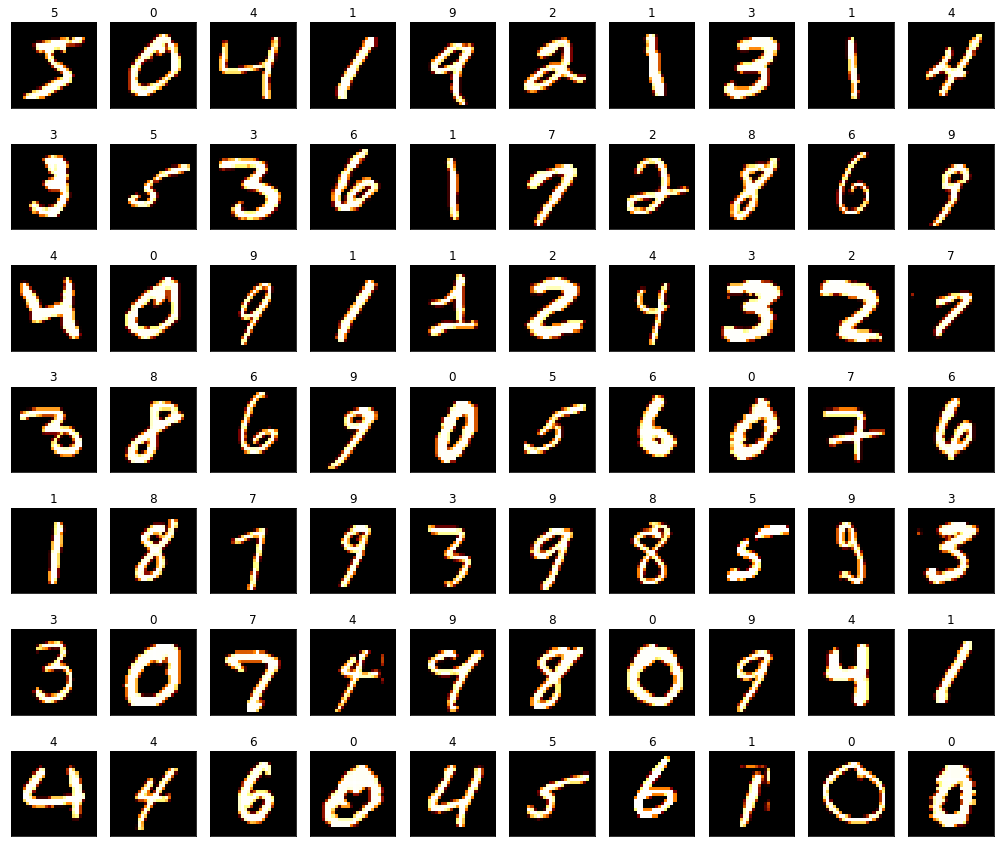

In [ ]:
plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = x_train[digit_num].reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
    plt.title(np.argmax(t_train[digit_num],axis=0))
plt.tight_layout()

#### 勾配確認

In [ ]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

##### **network.numerical_gradient**を解読しましょう
network.numerical_gradientという関数はchp.4で紹介されたが、当時の議論で説明しきれない部分がありますので、改めて説明します。




---


---




```
def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
```


---


```
 def loss(self, x, t):
        y = self.predict(x)
        # prefictは順伝播の関数
        return cross_entropy_error(y, t)
```




---


```
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad
```


---






#### pedict functionで順伝播の結果を計算する

ランダムに初期パラメータを生成

In [ ]:
input_size, hidden_size, output_size = 784,50,10
weight_init_std= 0.01
params = {}
params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
params['b1'] = np.zeros(hidden_size)
params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
params['b2'] = np.zeros(output_size)

In [ ]:
W1, W2 = params['W1'], params['W2']
b1, b2 = params['b1'], params['b2']

入力データを用意する

In [ ]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [ ]:
# 3はバッチ内三つのデータがあると、784は一つの画像データ
x_batch.shape

(3, 784)

In [ ]:
a1 = np.dot(x_batch, W1) + b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2) + b2
y = softmax(a2)

In [ ]:
for p,t in zip(y,t_batch):
  print("予測値は{},真の値は{}".format(np.argmax(p),np.argmax(t)))

予測値は6,真の値は5
予測値は6,真の値は0
予測値は6,真の値は4


cross_entropy_error functionで誤差を計算する



In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
loss= cross_entropy_error(y,t_batch)
print("loss={}".format(loss))

loss=2.317030625734852


元のコードはnet.Wに引数が格納されて、そして関数に渡すという形で計算している。\
その中身は、以下のように分解できる。

In [ ]:
def loss_a(x,t,W1,W2,b1,b2):
  #W1, W2 = params['W1'], params['W2']
  #b1, b2 = params['b1'], params['b2']  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  y = softmax(a2)
  error = cross_entropy_error(y, t)

  return error 

In [ ]:
loss= loss_a(x_batch,t_batch,W1,W2,b1,b2)
print("loss={}".format(loss))

loss=2.317030625734852


パラメータの勾配を求めるための関数

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
 
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
 
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
 
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
 
    return grad

$W_{1}$を例として勾配を求める 

In [ ]:
h = 1e-4 # 0.0001
grad = np.zeros_like(W1)
it = np.nditer(W1, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
  idx = it.multi_index
  tmp_val = W1[idx]
  W1[idx] = tmp_val + h
  fxh1 = loss_a(x_batch,t_batch,W1,W2,b1,b2) # f(x+h)
  #print(fxh1)
 
  W1[idx] = tmp_val - h 
  fxh2 = loss_a(x_batch,t_batch,W1,W2,b1,b2) # f(x-h)
  #print(fxh2)

  grad[idx] = (fxh1 - fxh2) / (2*h)
  #print(grad[idx])
 
  W1[idx] = tmp_val # 値を元に戻す
  it.iternext()   

勾配の出力を確認

In [ ]:
grad[600]

array([ 5.69242111e-04, -6.18326670e-04, -1.28256750e-03, -2.03223776e-04,
       -3.08951502e-04,  1.99019308e-04, -9.75491812e-04, -1.45852949e-03,
       -1.55624225e-04, -1.29169697e-04, -4.56087927e-04, -8.46577148e-04,
       -3.63986912e-04, -1.93852367e-04,  1.26751025e-03,  7.90685952e-04,
        1.60055621e-03, -4.31397682e-04, -1.15269719e-03,  1.55349045e-03,
        9.02198316e-05, -5.36035107e-04, -1.10255616e-03,  6.98183789e-04,
       -5.47497381e-05, -7.77203717e-04, -1.98334624e-04,  2.28447849e-03,
        4.36187761e-04, -1.57837103e-03,  8.94897523e-04, -1.17622086e-03,
        7.86152703e-04,  2.70975099e-03, -1.32384242e-03, -1.16573846e-03,
        3.63739669e-04, -2.40548281e-04,  9.67891147e-04, -1.38734022e-03,
       -2.88489055e-05, -5.27855630e-04,  2.37560815e-04,  1.45131605e-03,
       -1.09416075e-03,  1.16527607e-03,  1.44329201e-03,  1.66018105e-03,
       -2.03529262e-04,  6.87555117e-04])

##### **network.numerical_gradient**はただこの前に紹介した計算方法をパッチに対応させた


```
 def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads
```



In [ ]:
start_time = time.time()
grad_numerical = network.numerical_gradient(x_batch, t_batch)
print("---数値微分 %s seconds ---" % (time.time() - start_time))

---数値微分 11.26956295967102 seconds ---


In [ ]:
start_time = time.time()
grad_backprop = network.gradient(x_batch, t_batch)
print("---誤差逆伝播法 %s seconds ---" % (time.time() - start_time))

---誤差逆伝播法 0.0012819766998291016 seconds ---


2つの方法による勾配の差がほぼ0です

In [ ]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.1028438097724164e-10
b1:2.5420138896414074e-09
W2:4.343378962498192e-09
b2:1.3970555004100272e-07


### 誤差逆伝播法を使った学習

In [ ]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
      


    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % 500 == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("iter:{}".format(i))
        print("train_acc={}, test_acc={}".format(train_acc, test_acc))

iter:0
train_acc=0.12608333333333333, test_acc=0.1334
iter:500
train_acc=0.89915, test_acc=0.9023
iter:1000
train_acc=0.9173833333333333, test_acc=0.9206
iter:1500
train_acc=0.92855, test_acc=0.9248
iter:2000
train_acc=0.9381833333333334, test_acc=0.9369
iter:2500
train_acc=0.9425666666666667, test_acc=0.9408
iter:3000
train_acc=0.95025, test_acc=0.9491
iter:3500
train_acc=0.9535166666666667, test_acc=0.9527
iter:4000
train_acc=0.9570333333333333, test_acc=0.9559
iter:4500
train_acc=0.9616166666666667, test_acc=0.9583
iter:5000
train_acc=0.9610666666666666, test_acc=0.9575
iter:5500
train_acc=0.96615, test_acc=0.9618
iter:6000
train_acc=0.9682, test_acc=0.9621
iter:6500
train_acc=0.9710166666666666, test_acc=0.9651
iter:7000
train_acc=0.9712, test_acc=0.9654
iter:7500
train_acc=0.97365, test_acc=0.9675
iter:8000
train_acc=0.9748166666666667, test_acc=0.968
iter:8500
train_acc=0.9743, test_acc=0.9676
iter:9000
train_acc=0.9766333333333334, test_acc=0.9672
iter:9500
train_acc=0.978166666

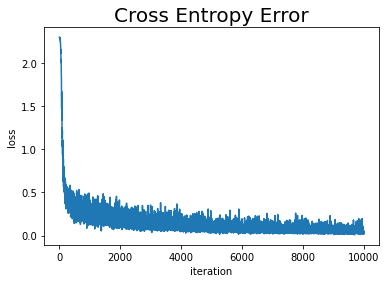

In [ ]:
x = np.arange(iters_num)


plt.plot(x, train_loss_list)
plt.xlabel("iteration") 
plt.ylabel("loss") 
plt.title("Cross Entropy Error", fontsize=20) 
plt.show()

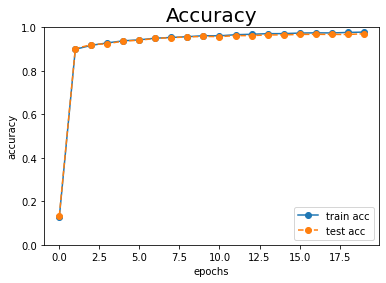

In [ ]:
x = np.arange(len(train_acc_list))
from matplotlib import pyplot


pyplot.plot(x, train_acc_list,'-o' , label="train acc")
pyplot.plot(x, test_acc_list, '-o', label="test acc", linestyle="--") 
pyplot.xlabel("epochs")
pyplot.ylabel("accuracy") 
pyplot.ylim(0, 1) 
pyplot.legend() 
pyplot.title("Accuracy", fontsize=20) 
pyplot.show()

学習済みのモデルで予測を行う

In [ ]:
predict_value= network.predict(x_train[:10])
predict_value = np.argmax(predict_value, axis=1)

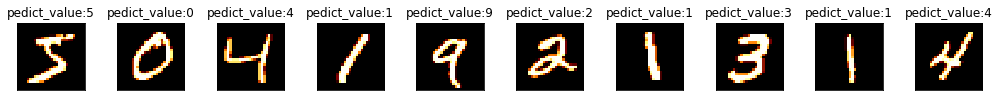

In [ ]:
predict_value= network.predict(x_train[:10])
predict_value = np.argmax(predict_value, axis=1)
plt.figure(figsize=(14,12))
for digit_num in range(0,10):
    plt.subplot(1,10,digit_num+1)
    grid_data = x_train[digit_num].reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
    plt.title("pedict_value:{}".format(predict_value[digit_num]))
plt.tight_layout()

## 参考になった資料
1. [バッチ版Affineレイヤの逆伝播【ゼロつく1のノート(数学)】](https://www.anarchive-beta.com/entry/2020/08/04/180000)
2. [ソフトマックス関数と交差エントロピー誤差の逆伝播【ゼロつく1のノート(数学)】](https://www.anarchive-beta.com/entry/2020/08/06/180000)
3. [ニューラルネットワークの基礎](https://tutorials.chainer.org/ja/13_Basics_of_Neural_Networks.html)
4. [DeepNotes](https://deepnotes.io/)
5. [3Blue1Brown](https://www.3blue1brown.com/)
